In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

import os
import json
import re
import collections
import math
%matplotlib inline

dylist = [('唐', 'tang'), ('宋', 'song'), ('元', 'yuan'), ('明' , 'ming'), ('清', 'qing')]

In [2]:
def read_dynasty(dynasty = '宋'):
    edge_lists = []
    count = 0
    node_num = 0
    dynasty_dir = os.path.join('datas', dynasty)
    for fname in os.listdir(dynasty_dir):
        node_num += 1
        fpath = os.path.join(dynasty_dir, fname)
        f = open(fpath)
        json_data = json.load(f)
        if 'PersonSocialAssociation' in json_data:
            person_association = json_data["PersonSocialAssociation"]
            if 'Association' in person_association:
                person_assoc = person_association['Association']
                if isinstance(person_assoc, list):
                    for person in person_association['Association']:
                        if 'AssocPersonId' in person:
                            #print(fname[:fname.rfind('.')], person['AssocPersonId'])
                            edge_lists.append((fname[:fname.rfind('.')], person['AssocPersonId']))
                        count +=1
                        #if count > 10:break
                elif isinstance(person_assoc, dict):
                    #print('dict:', fname[:fname.rfind('.')], person_assoc['AssocPersonId'])
                    edge_lists.append((fname[:fname.rfind('.')], person_assoc['AssocPersonId']))
                    count += 1
    print(count,node_num)
    G = nx.Graph()
    G.add_edges_from(edge_lists)
    #nx.draw(G, with_labels=False, font_weight='bold')
    print(nx.info(G)) 
    return G


In [3]:
g = read_dynasty('唐')
nx.write_gexf(g, "./vis_datas/tang.gexf")
g = read_dynasty('宋')
nx.write_gexf(g, "./vis_datas/song.gexf")
g = read_dynasty('元')
nx.write_gexf(g, "./vis_datas/yuan.gexf")
g = read_dynasty('明')
nx.write_gexf(g, "./vis_datas/ming.gexf")
g = read_dynasty('清')
nx.write_gexf(g, "./vis_datas/qing.gexf")

501 50402
Name: 
Type: Graph
Number of nodes: 365
Number of edges: 286
Average degree:   1.5671
85218 53531
Name: 
Type: Graph
Number of nodes: 17114
Number of edges: 30330
Average degree:   3.5445
26341 23228
Name: 
Type: Graph
Number of nodes: 6424
Number of edges: 11864
Average degree:   3.6936
30894 189622
Name: 
Type: Graph
Number of nodes: 8350
Number of edges: 14609
Average degree:   3.4992
5611 89435
Name: 
Type: Graph
Number of nodes: 3128
Number of edges: 3059
Average degree:   1.9559


唐


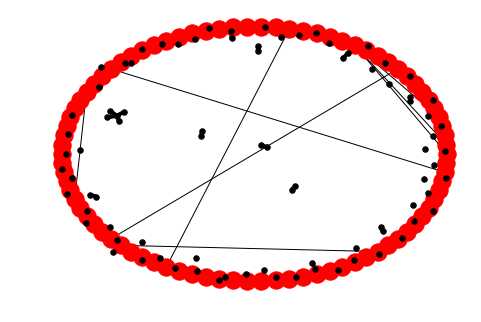

宋


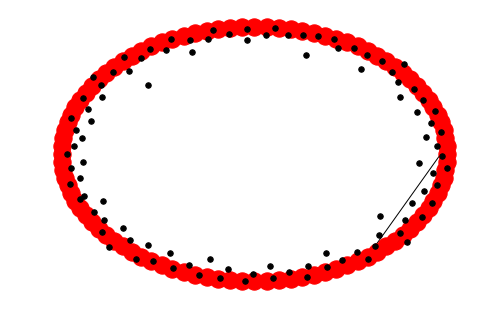

元


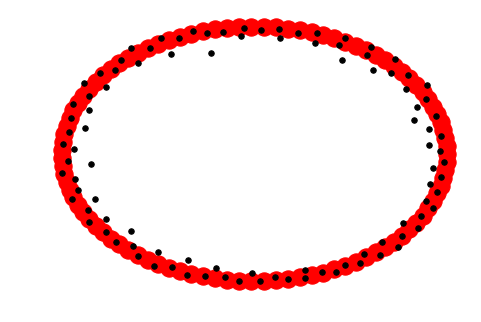

明


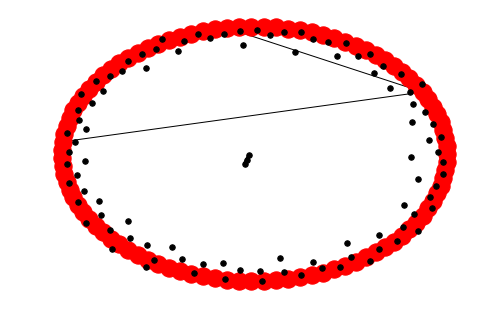

清


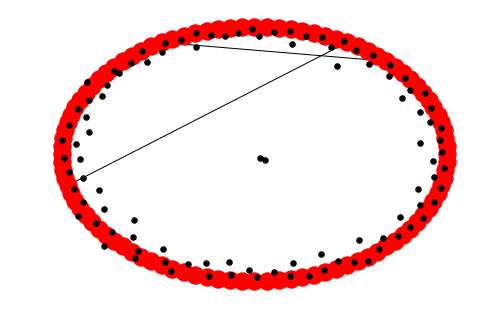

In [4]:
def vis_network(graph, nodes_num = 100):
    '''
    实现网络的可视化，通过随机采样的方式对数据进行基本的可视化。
    当然更为合理的方式是将网络导入到gephi中。
    '''
    nodes = graph.nodes()
    nodes = np.array(nodes)
    samples = np.random.randint(0, len(nodes), nodes_num)
    samples_nodes = nodes[samples.tolist()]
    subgraph = graph.subgraph(samples_nodes)
    nx.draw(subgraph, pos=nx.draw_shell(subgraph), node_color='black', node_size=30, width=4)
    plt.show()

for dy in dylist:
    file_path = './vis_datas/'+dy[1]+'.gexf'
    g = nx.read_gexf(file_path)
    print(dy[0])
    vis_network(g)

唐
365 0
1
[1.5848931924611136, 2.51188643150958, 3.981071705534973, 6.309573444801933, 10.0, 15.848931924611133]


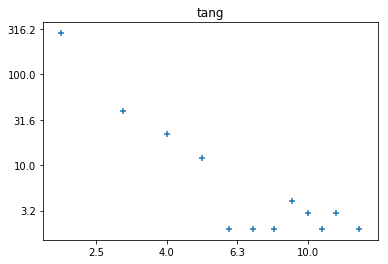

宋
17114 0
1
[1.0, 3.1622776601683795, 10.0, 31.622776601683793, 100.0, 316.22776601683796, 1000.0, 3162.2776601683795]


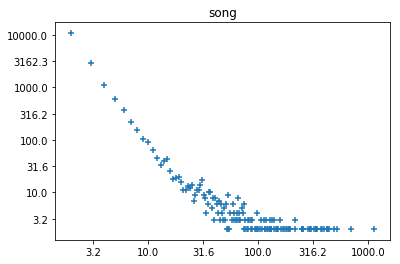

元
6424 0
1
[1.0, 3.1622776601683795, 10.0, 31.622776601683793, 100.0, 316.22776601683796, 1000.0]


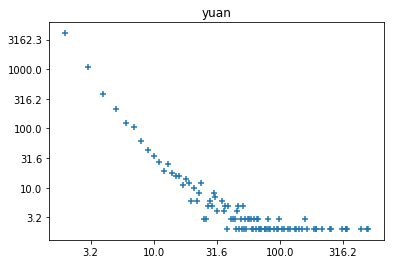

明
8350 0
1
[1.0, 3.1622776601683795, 10.0, 31.622776601683793, 100.0, 316.22776601683796, 1000.0]


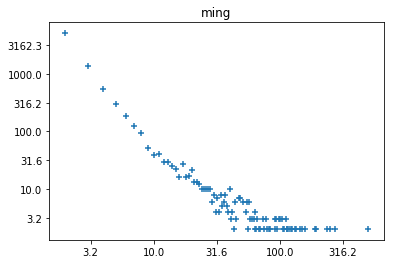

清
3128 0
1
[1.0, 1.7782794100389228, 3.1622776601683795, 5.623413251903491, 10.0, 17.78279410038923, 31.622776601683793, 56.23413251903491, 100.0, 177.82794100389228]


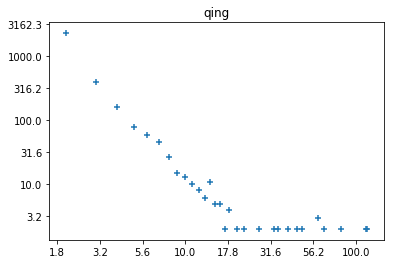

In [33]:
from networkx.algorithms import approximation as approx
def vis_degree_distribution(graph, dynasty):
    degree_seq = [d for n,d in graph.degree()]
    print(len(degree_seq), approx.node_connectivity(graph))
    degree = sorted(degree_seq, reverse=True)
    print(min(degree))
    degreeCount = collections.Counter(degree)
    deg, cnt = zip(*degreeCount.items())
    ln_deg = [math.log(i, 10) for i in deg]
    ln_cn = [math.log(i, 10) for i in cnt]
#     plt.bar(deg, cnt, width=0.8)
    ax = plt.subplot()
    ax.scatter(ln_deg, ln_cn, marker='+')
   # print([i for i in ax.get_xticks()])
    print([10**i for i in ax.get_xticks()])
    ax.set_xticklabels([round(10**i,1) for i in ax.get_xticks()])
    ax.set_yticklabels([round(10**i,1) for i in ax.get_yticks()])
    ax.set_title(dynasty)
    #plt.yticks()
    ax.set_xlabel('frequency')
    ax.set_ylabel('')
    plt.show()

for dy in dylist:
    file_path = './vis_datas/'+dy[1]+'.gexf'
    g = nx.read_gexf(file_path)
    print(dy[0])
    vis_degree_distribution(g, dy[1])
    


In [6]:
for dy in dylist:
    file_path = './vis_datas/'+dy[1]+'.gexf'
    g = nx.read_gexf(file_path)
    # connected_g = nx.connected_components(g)
    for i in nx.connected_components(g):
        largest_nodes = i
        largest_g = g.subgraph(largest_nodes)
        nx.write_gexf(largest_g, './vis_datas/' + dy[1] + '_largest_connected.gexf')
        print(dy[0], 'largest connected subgraph')
        print(nx.info(largest_g))
        print(nx.average_shortest_path_length(largest_g))
        break
# largest = sorted(, key = len, reverse=True)[0]
# print(nx.average_shortest_path_length(largest))

唐 largest connected subgraph
Name: 
Type: SubGraph
Number of nodes: 14
Number of edges: 13
Average degree:   1.8571
2.076923076923077
宋 largest connected subgraph
Name: 
Type: SubGraph
Number of nodes: 16456
Number of edges: 29935
Average degree:   3.6382


KeyboardInterrupt: 

In [ ]:
def get_signed_graph(dynasty='宋'):
    pass